In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adani-group-stock-prices-20162023/ADANIENT.NS.csv
/kaggle/input/nvidia-historical-stock-data/nvidia_historical_stock_data.csv


In [2]:
#Importing of liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import lag_plot

# **INDEX**
INITIAL READING AND CLEANING PROCESS

EDA

MODEL PREPARATION

PREDICTIVE ANALYSIS

QUESTIONS

1. CLOSE VALUE OF NVIDIA STOCKS VISUAL
   
2. OPEN VALUE OF NVIDIA STOCKS VISUAL

3. CUMULATIVE SUM PRESENTING OPEN, HIGH, VOLUME, LOW, CLOSE

4. YEAR WISE CLOSE GRAPH

5. CORRELATION CHART

# **INITIAL READING AND CLEANING PROCESS**

In [3]:
#Reading of file
df = pd.read_csv('/kaggle/input/nvidia-historical-stock-data/nvidia_historical_stock_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,1999-10-21 00:00:00,0.038334,0.040244,0.037259,0.040244,382128000
1,1999-10-22 00:00:00,0.040125,0.042394,0.040125,0.041200,286752000
2,1999-10-25 00:00:00,0.040961,0.041559,0.039170,0.039170,213840000
3,1999-10-26 00:00:00,0.040842,0.044425,0.040603,0.042991,481248000
4,1999-10-27 00:00:00,0.043230,0.043469,0.040364,0.041081,214128000
...,...,...,...,...,...,...
6285,2024-10-15 00:00:00,137.869995,138.570007,128.740005,131.600006,377831000
6286,2024-10-16 00:00:00,133.979996,136.619995,131.580002,135.720001,264879700
6287,2024-10-17 00:00:00,139.339996,140.889999,136.869995,136.929993,306435900
6288,2024-10-18 00:00:00,138.669998,138.899994,137.279999,138.000000,176090200


In [5]:
#Getting info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6290 non-null   object 
 1   Open    6290 non-null   float64
 2   High    6290 non-null   float64
 3   Low     6290 non-null   float64
 4   Close   6290 non-null   float64
 5   Volume  6290 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 295.0+ KB


In [6]:
#Getting stats on numeric data
df.describe()

,Open,High,Low,Close,Volume
count,6290.000000,6290.000000,6290.000000,6290.000000,6.290000e+03
mean,7.413215,7.552883,7.263899,7.415679,6.152477e+08
std,19.579643,19.955825,19.159134,19.577934,4.295346e+08
min,0.038334,0.040244,0.037259,0.039170,4.564400e+07
25%,0.270100,0.277495,0.262916,0.269890,3.549901e+08
50%,0.442333,0.448562,0.435627,0.442142,5.131920e+08
75%,4.512542,4.586693,4.463839,4.539182,7.403648e+08
max,139.788047,143.710007,138.000000,143.710007,9.230856e+09


# **EDA**

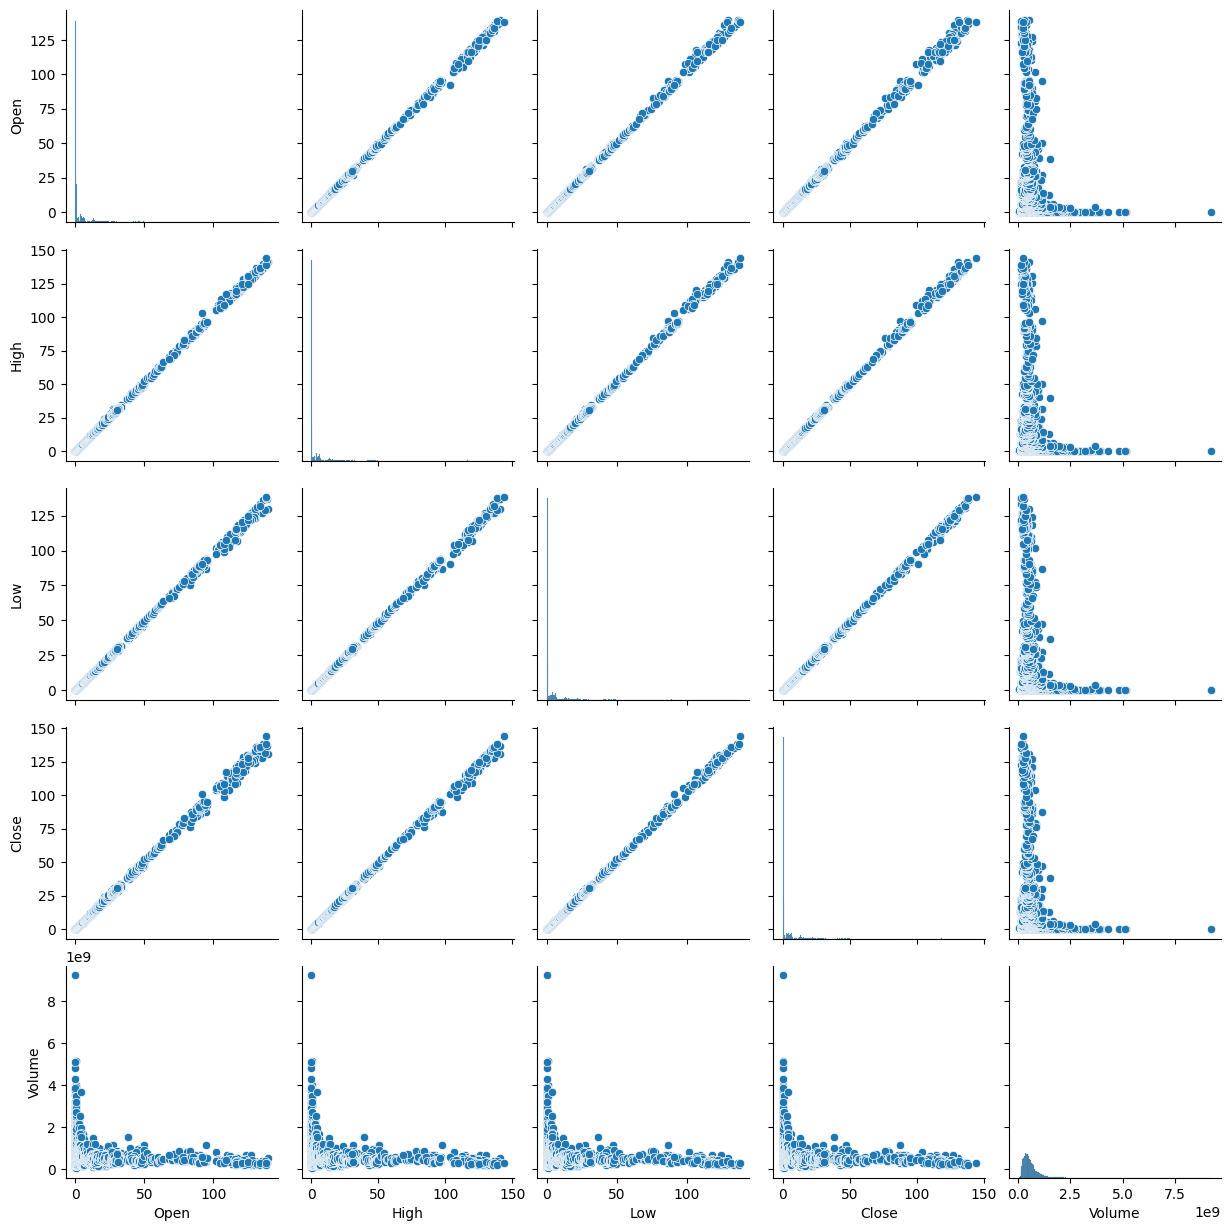

In [7]:
#PAIRPLOT
sns.pairplot(df)

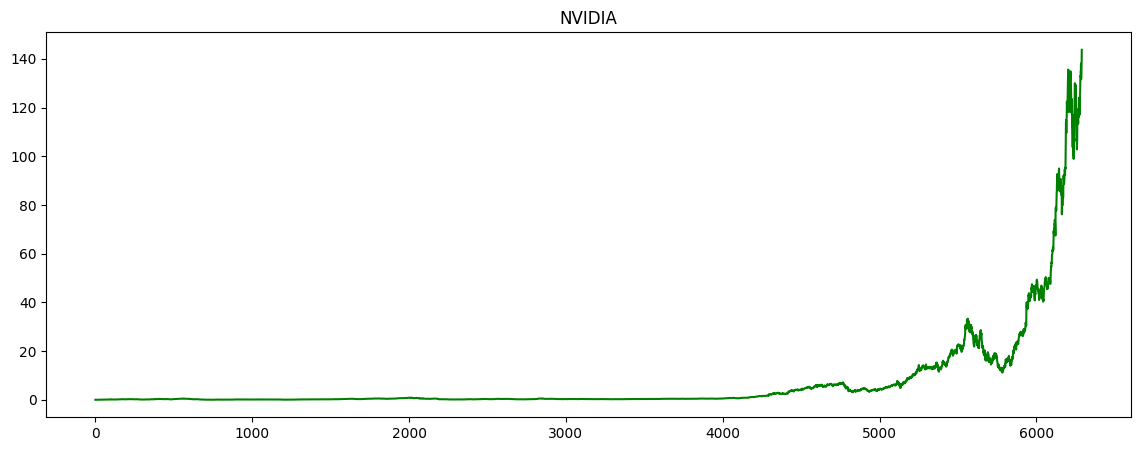

In [8]:
# ANSWER 1 NVIDIA CLOSE VALUE
#Close plot of nvidia
plt.figure(figsize=(14,5))
plt.plot(df[['Close']],color="green")
plt.title('NVIDIA')
plt.show()

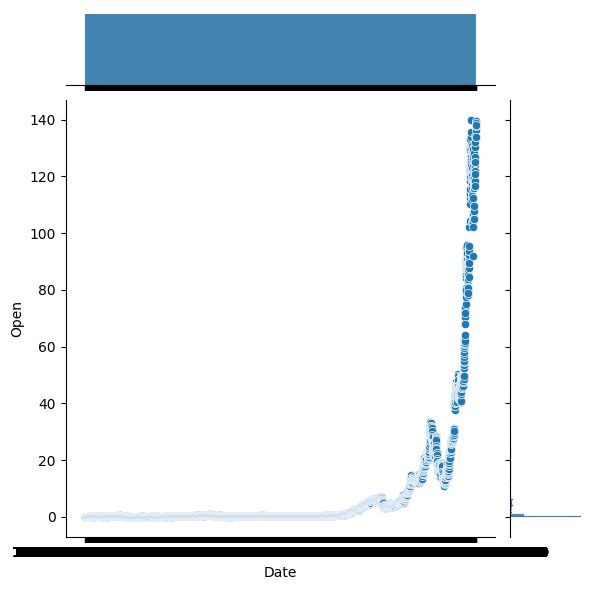

In [9]:
# ANSWER 1 NVIDIA OPEN VALUE VISUALIZATION
#JOIN PLOT
sns.jointplot(data=df, x='Date', y="Open")

Text(0.5, 1.0, 'Returns')

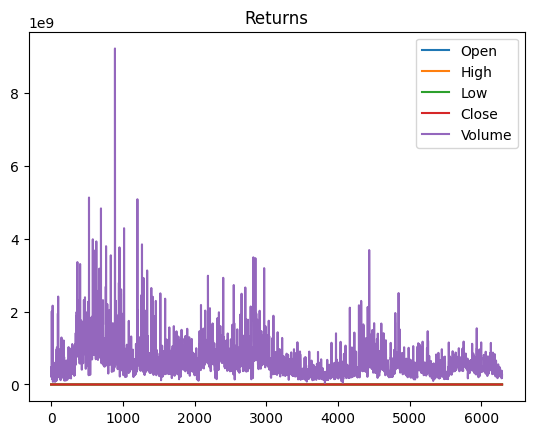

In [10]:
# ANSWER 3 CUMULATIVE SUM PLOT
dret = df.cumsum()
df.plot()
plt.title('Returns')

Text(0.5, 1.0, 'Nvidea Autocorrelation plot')

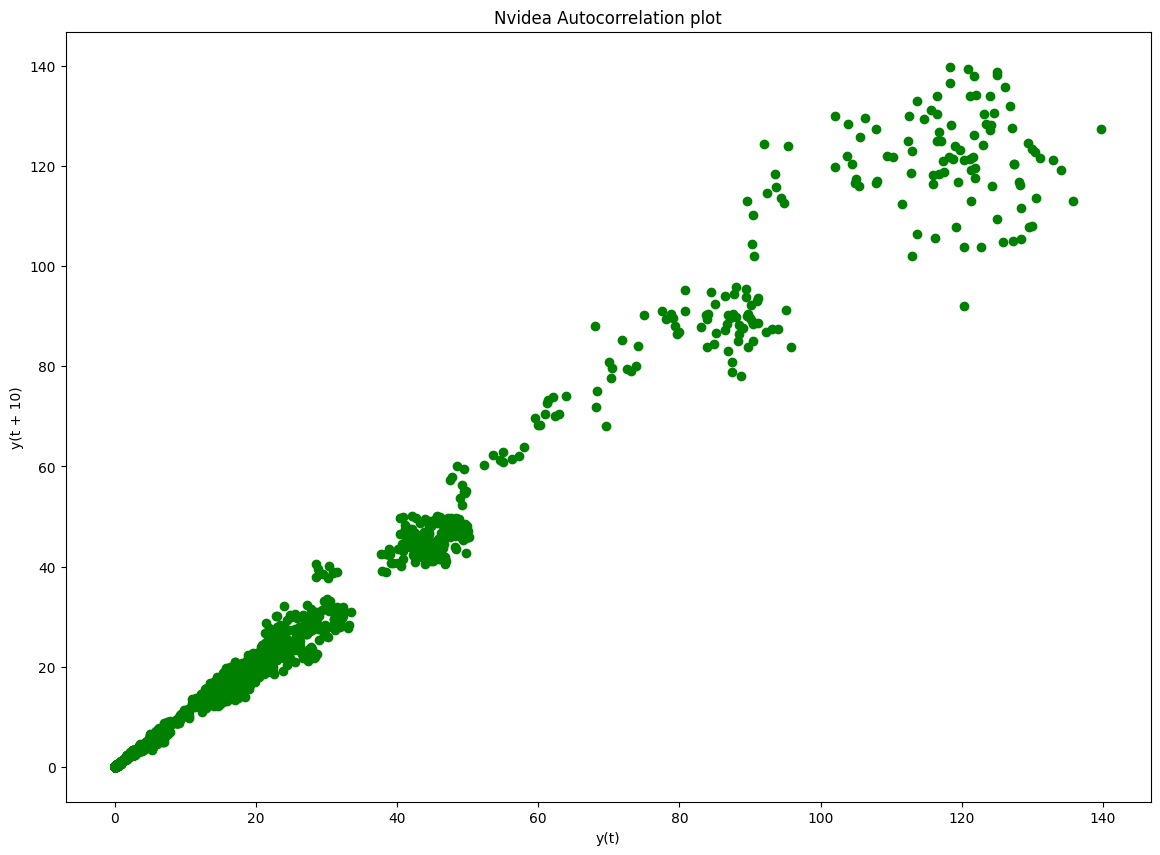

In [11]:
#LAG Plot
plt.figure(figsize=(14,10))
lag_plot(df['Open'], lag=10,c="green")
plt.title('Nvidea Autocorrelation plot')

# **MODEL PREPRATION**
Splitting of Date column into splits of year month day and Day of week

In [12]:
#Converting date as object to date as date time
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
#Converting object to year,month ,day and day of week one by one
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [14]:
#Simplifing more to quarter and day of year
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear

In [15]:
#Dropping of initial dtae column
df.drop(columns=['Date'], inplace=True)

In [16]:
df

,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
0,0.038334,0.040244,0.037259,0.040244,382128000,1999,10,21,3,4,294
1,0.040125,0.042394,0.040125,0.041200,286752000,1999,10,22,4,4,295
2,0.040961,0.041559,0.039170,0.039170,213840000,1999,10,25,0,4,298
3,0.040842,0.044425,0.040603,0.042991,481248000,1999,10,26,1,4,299
4,0.043230,0.043469,0.040364,0.041081,214128000,1999,10,27,2,4,300
...,...,...,...,...,...,...,...,...,...,...,...
6285,137.869995,138.570007,128.740005,131.600006,377831000,2024,10,15,1,4,289
6286,133.979996,136.619995,131.580002,135.720001,264879700,2024,10,16,2,4,290
6287,139.339996,140.889999,136.869995,136.929993,306435900,2024,10,17,3,4,291
6288,138.669998,138.899994,137.279999,138.000000,176090200,2024,10,18,4,4,292


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6290 non-null   float64
 1   High       6290 non-null   float64
 2   Low        6290 non-null   float64
 3   Close      6290 non-null   float64
 4   Volume     6290 non-null   int64  
 5   Year       6290 non-null   int32  
 6   Month      6290 non-null   int32  
 7   Day        6290 non-null   int32  
 8   DayOfWeek  6290 non-null   int32  
 9   Quarter    6290 non-null   int32  
 10  DayOfYear  6290 non-null   int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 393.2 KB


FLITER DATA FROM 2018-2024

In [18]:
yn =df[(df['Year'] > 2017)]

In [19]:
yn

,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
4578,4.841929,4.933930,4.810273,4.930220,355616000,2018,1,2,1,1,2
4579,5.047694,5.285116,5.039038,5.254696,914704000,2018,1,3,2,1,3
4580,5.336064,5.392699,5.260138,5.282397,583268000,2018,1,4,3,1,4
4581,5.297236,5.364505,5.220321,5.327161,580124000,2018,1,5,4,1,5
4582,5.450818,5.564582,5.405806,5.490388,881216000,2018,1,8,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
6285,137.869995,138.570007,128.740005,131.600006,377831000,2024,10,15,1,4,289
6286,133.979996,136.619995,131.580002,135.720001,264879700,2024,10,16,2,4,290
6287,139.339996,140.889999,136.869995,136.929993,306435900,2024,10,17,3,4,291
6288,138.669998,138.899994,137.279999,138.000000,176090200,2024,10,18,4,4,292


<Axes: xlabel='Year', ylabel='Close'>

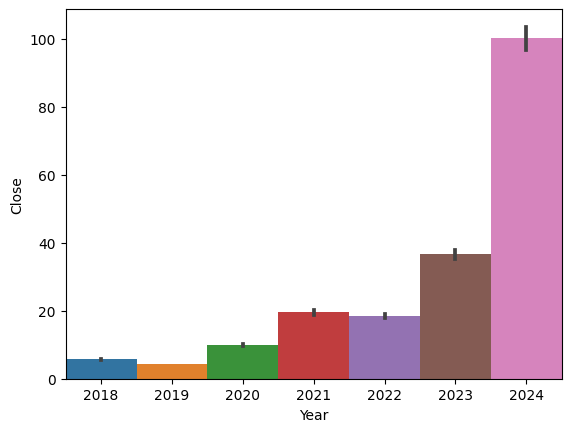

In [20]:
#ANSWER 4
#Creating of bar plot as per year and close
sns.barplot(x='Year',y='Close',data=yn,width=1.0)

<Axes: >

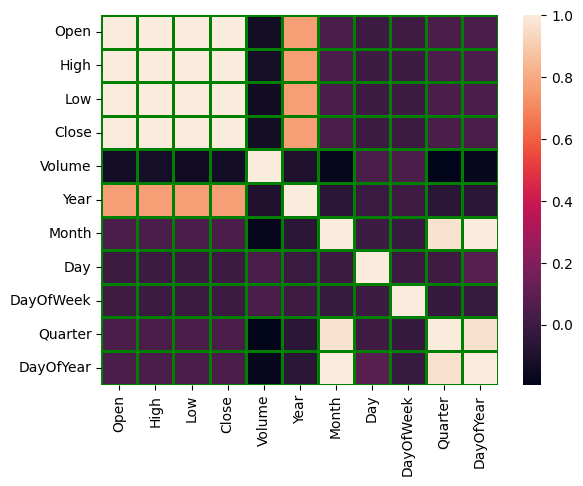

In [21]:
#ANSWER 5
#Correlation chart
coreal=yn.corr()
linewidths = 2
linecolor = "green"
sns.heatmap(coreal,linewidths=linewidths, 
                linecolor=linecolor)

In [22]:
#

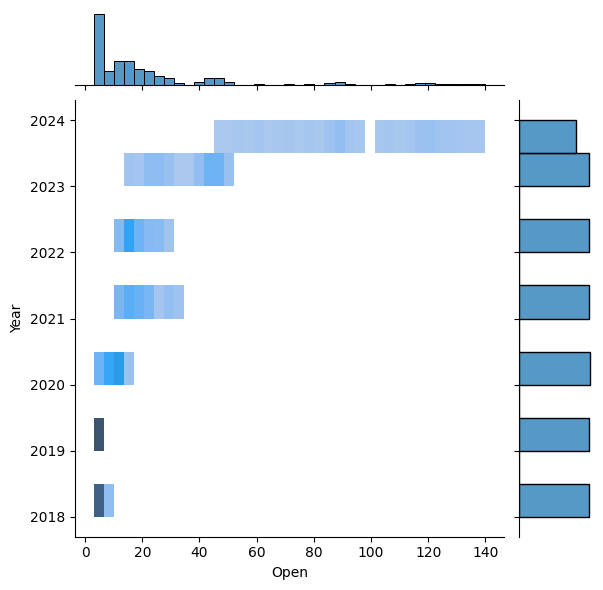

In [23]:
#Join plot for open and year
sns.jointplot(data=yn, x="Open", y="Year", kind="hist")


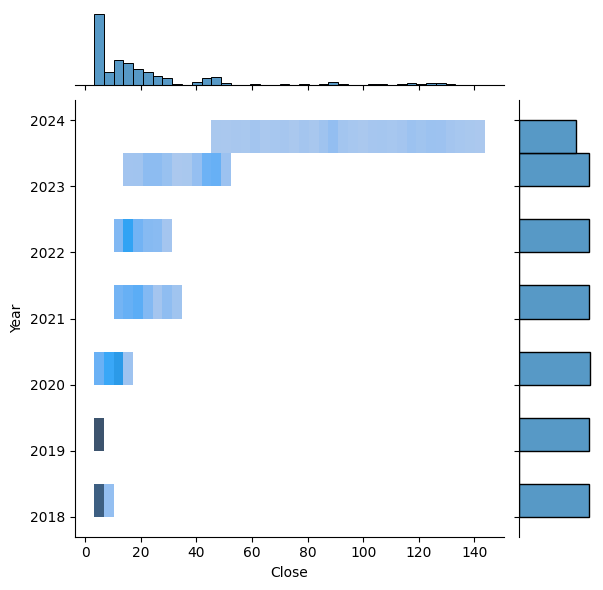

In [24]:
#Join plot for close and year
sns.jointplot(data=yn, x="Close", y="Year", kind="hist")

<Axes: xlabel='Close'>

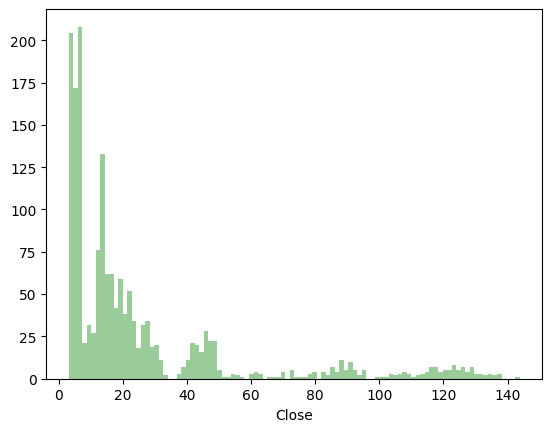

In [25]:
#Distplpot for univariate distribution
sns.distplot(yn['Close'],bins=100,kde=False,color='green')

<Axes: xlabel='Open'>

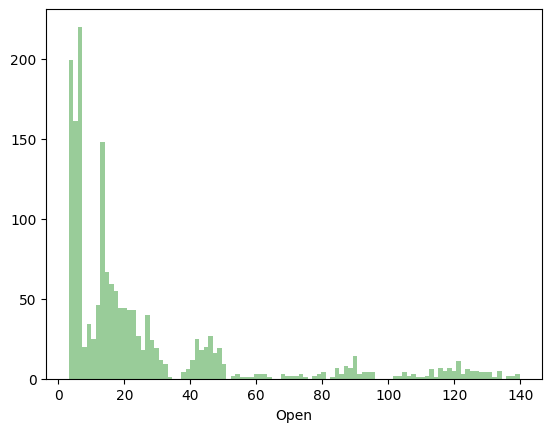

In [26]:
#Distplot for univariate distribution
sns.distplot(yn['Open'],bins=100,kde=False,color='green')

# **PREDICTIVE ANALYSIS MODEL**

In [27]:
yn

,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
4578,4.841929,4.933930,4.810273,4.930220,355616000,2018,1,2,1,1,2
4579,5.047694,5.285116,5.039038,5.254696,914704000,2018,1,3,2,1,3
4580,5.336064,5.392699,5.260138,5.282397,583268000,2018,1,4,3,1,4
4581,5.297236,5.364505,5.220321,5.327161,580124000,2018,1,5,4,1,5
4582,5.450818,5.564582,5.405806,5.490388,881216000,2018,1,8,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
6285,137.869995,138.570007,128.740005,131.600006,377831000,2024,10,15,1,4,289
6286,133.979996,136.619995,131.580002,135.720001,264879700,2024,10,16,2,4,290
6287,139.339996,140.889999,136.869995,136.929993,306435900,2024,10,17,3,4,291
6288,138.669998,138.899994,137.279999,138.000000,176090200,2024,10,18,4,4,292


In [28]:
#TRAIN AND TEST SPLIT
#Importing of necessary liabrary
from sklearn.model_selection import train_test_split

In [29]:
x = yn[['Open','High','Low','Close','Volume','Year','Month','Day','DayOfWeek',
         'Quarter','DayOfYear']]
y = yn['Close']

In [30]:
x.shape

(1712, 11)

In [31]:
y.shape

(1712,)

In [32]:
x_train ,x_test ,y_train ,y_test  = train_test_split(x,y,random_state=40,test_size=0.2)

In [33]:
x_train.shape

(1369, 11)

In [34]:
x_test.shape

(343, 11)

In [35]:
y_train.shape

(1369,)

In [36]:
y_test.shape

(343,)

In [37]:
x_train.head()

,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,Quarter,DayOfYear
4847,3.376587,3.424948,3.249112,3.263745,1153932000,2019,1,29,1,1,29
5883,23.397570,23.615464,22.714903,22.953787,474866000,2023,3,10,4,1,69
4885,4.365909,4.430208,4.247985,4.314271,525212000,2019,3,25,0,1,84
4676,5.949849,6.130861,5.949106,6.129622,442956000,2018,5,23,2,2,143
6077,48.183659,49.393399,48.109674,48.879509,479948000,2023,12,15,4,4,349


Building of Model 

In [38]:
#Importing of necessary liabrary
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100, random_state=40)

In [39]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=40)

In [40]:
y_pred=rfr.predict(x_test)

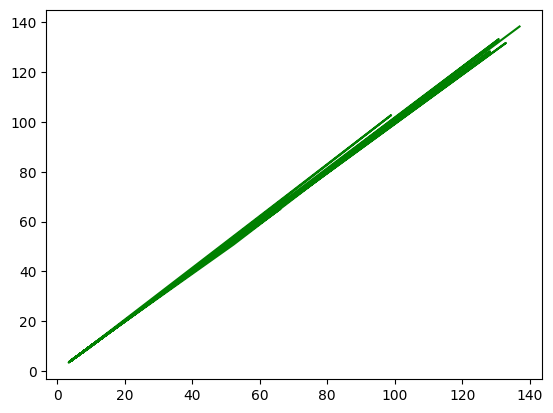

In [41]:
#Prediction plot on what we tested and result 
plt.plot(y_test,y_pred,color="green")

<Axes: ylabel='Density'>

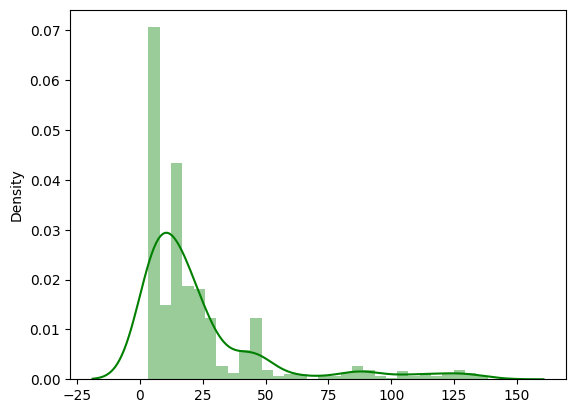

In [42]:
sns.distplot((y_test,y_pred),color="green")

Model Evaluation

In [43]:
#Importing necessary liabraries
from sklearn import metrics

In [44]:
metrics.mean_absolute_error(y_test,y_pred)

0.0883194631668291

In [45]:
metrics.mean_squared_error(y_test,y_pred)

0.09563968942342865

In [46]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.3092566723992041

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9998719047580911